In [2]:
from astropy.table import Table

from astropy.cosmology import FlatLambdaCDM # Helpful cosmlogy tools, see https://docs.astropy.org/en/stable/api/astropy.cosmology.FlatLambdaCDM.html
import astropy.units as U # Handling units: can assign units to variables then units worked out for you when doing operations etc, can be a bit fiddlt 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys, os

# global font parameters, for plotting purposes
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams['font.size'] = 15

In [3]:
N = Table.read('/pscratch/sd/e/edown/DA02/LSS/guadalupe/LSScats/new_kcorrs/BGS_BRIGHT_N_clustering.dat.fits') # My catalogues made with Sam's new k corrections, location of originals will probably have changed 
S = Table.read('/pscratch/sd/e/edown/DA02/LSS/guadalupe/LSScats/new_kcorrs/BGS_BRIGHT_S_clustering.dat.fits')

In [4]:
N0 = Table.read('/pscratch/sd/e/edown/DA02/LSS/guadalupe/LSScats/new_kcorrs/BGS_BRIGHT_N_0_clustering.ran.fits')
S0 = Table.read('/pscratch/sd/e/edown/DA02/LSS/guadalupe/LSScats/new_kcorrs/BGS_BRIGHT_S_0_clustering.ran.fits')

In [5]:
#nz.txt file tells you helpful information

with open('/pscratch/sd/e/edown/DA02/LSS/guadalupe/LSScats/test/BGS_BRIGHT_N_nz.txt') as file:
    print('N') 
    print(file.read(30))
    print('mean completeness 0.4852280701578518')
    
with open('/pscratch/sd/e/edown/DA02/LSS/guadalupe/LSScats/test/BGS_BRIGHT_S_nz.txt') as file:
    print('S')
    print(file.read(30))
    print('mean completeness 0.4866236831842629')


N
#area is 656.6304square degree
mean completeness 0.4852280701578518
S
#area is 1080.076square degree
mean completeness 0.4866236831842629


In [6]:
A_N = 656.6304 # Add areas for normalization of histograms
A_S = 1080.076

A = A_N + A_S

N['AREA'] = A_N
S['AREA'] = A_S

In [7]:
data = Table(np.hstack((N, S)))
data_rand = Table(np.hstack((N0,S0)))

## Some distributions of properties: absolute magnitude, colour, redshift

Distributions should be the same between data and randoms, matching any differences between N and S

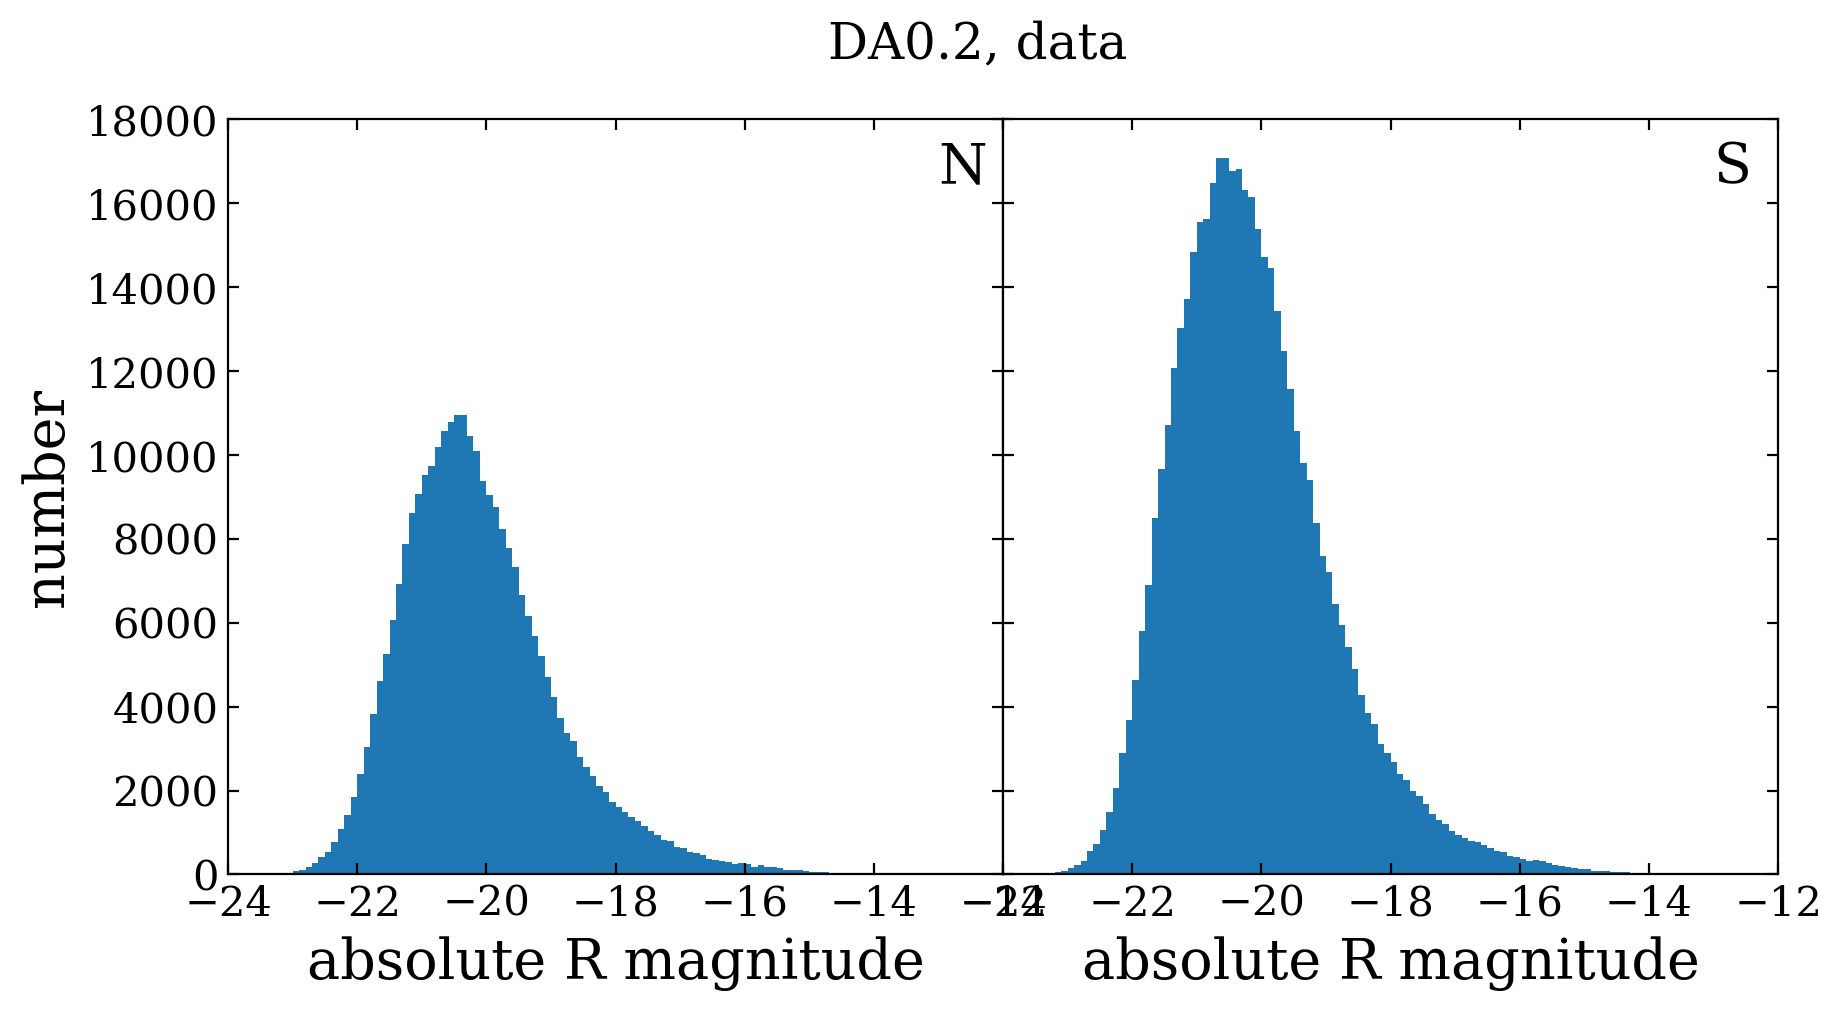

In [18]:
s=20
plt.figure(figsize=(10,5),dpi=200)
plt.suptitle("DA0.2, data")
M_range = np.arange(-25,-10,0.1)
ax1 = plt.subplot(121)
ax1.text(-13,16500,'N', size=s)
ax1.hist(N['ABSMAG_RP1'], bins=M_range)
plt.xlabel('absolute R magnitude', size=s)
plt.ylabel('number', size=s)
plt.ylim(0,18000)
plt.xlim(-24,-12)
#plt.xticks([-24,-23,-22,-21,-20,-19,-18])

ax2 = plt.subplot(122)
ax2.text(-13,16500,'S', size=s)
ax2.hist(S['ABSMAG_RP1'], bins=M_range)
plt.xlabel('absolute R magnitude', size=s)
ax2.set_yticklabels([])
plt.ylim(0,18000)
plt.xlim(-24,-12)

plt.subplots_adjust(wspace=0)

ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.show()

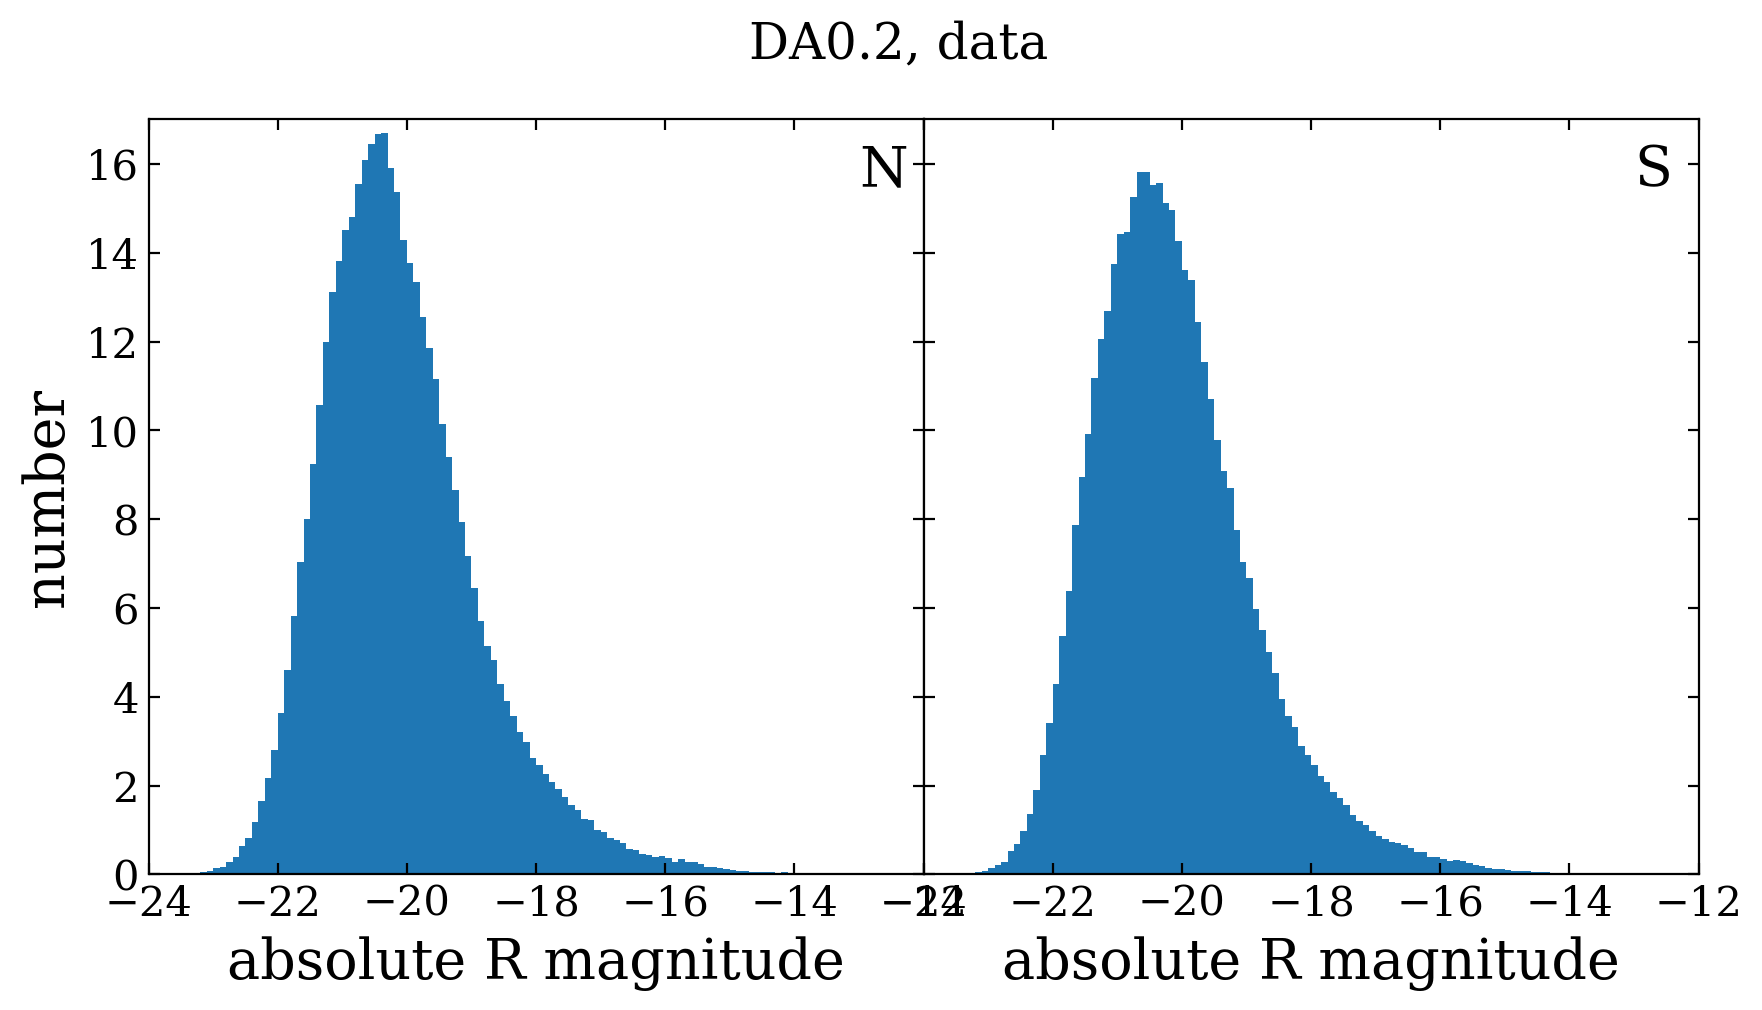

In [19]:
s=20
plt.figure(figsize=(10,5),dpi=200)
plt.suptitle("DA0.2, data")
M_range = np.arange(-25,-10,0.1)
ax1 = plt.subplot(121)
ax1.text(-13,15.5,'N', size=s)
ax1.hist(N['ABSMAG_RP1'], bins=M_range, weights=1/N['AREA']) # When weighted by area, histograms are ~ the same between N/S
plt.xlabel('absolute R magnitude', size=s)
plt.ylabel('number', size=s)
plt.ylim(0,17)
plt.xlim(-24,-12)
#plt.xticks([-24,-23,-22,-21,-20,-19,-18])

ax2 = plt.subplot(122)
ax2.text(-13,15.5,'S', size=s)
ax2.hist(S['ABSMAG_RP1'], bins=M_range, weights=1/S['AREA'])
plt.xlabel('absolute R magnitude', size=s)
ax2.set_yticklabels([])
plt.ylim(0,17)
plt.xlim(-24,-12)

plt.subplots_adjust(wspace=0)

ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.show()

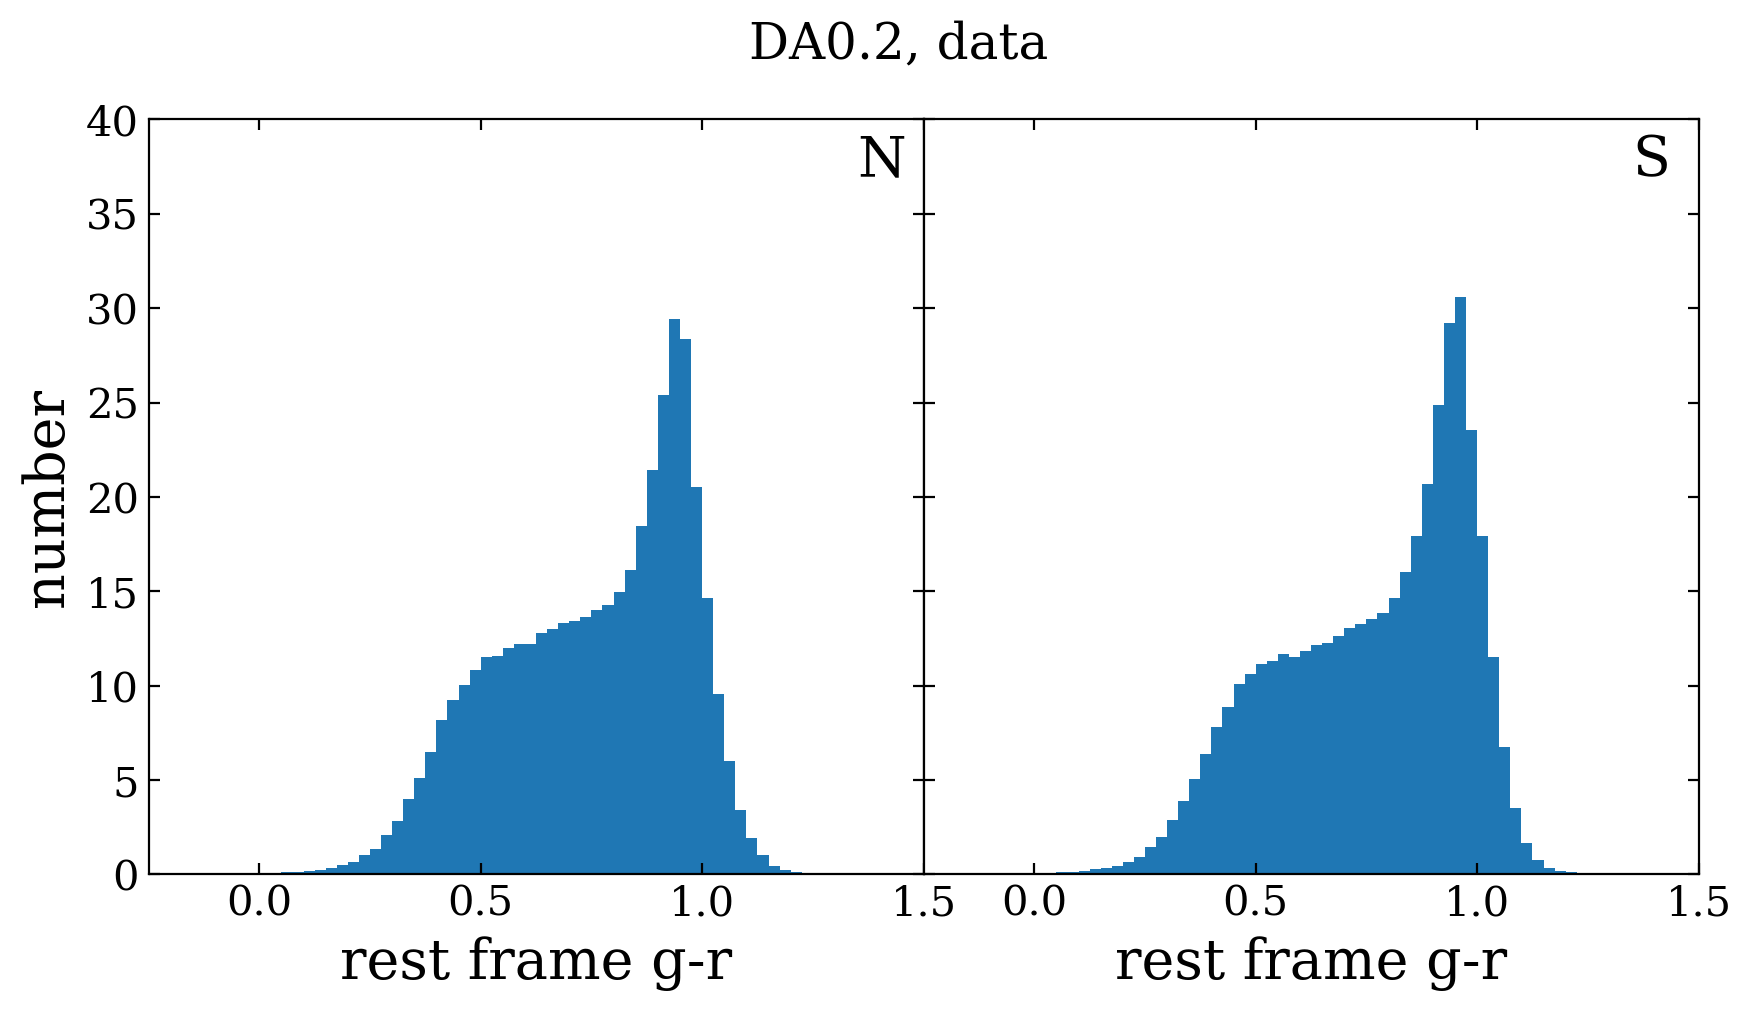

In [20]:
s=20
plt.figure(figsize=(10,5),dpi=200)
plt.suptitle("DA0.2, data")
ax1 = plt.subplot(121)
plt.text(1.35,37, 'N', size=s)
ax1.hist(N['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025), weights=1/N['AREA'])
plt.xlabel('rest frame g-r', size=s)
plt.ylabel('number', size=s)
plt.ylim(0,40)
plt.xlim(-0.25,1.5)

ax2 = plt.subplot(122)
plt.text(1.35,37, 'S', size=s)
ax2.hist(S['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025), weights=1/S['AREA'])
plt.xlabel('rest frame g-r', size=s)
plt.ylim(0,40)
plt.xlim(-0.25,1.5)
ax2.set_yticklabels([])

plt.subplots_adjust(wspace=0)

ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.show()

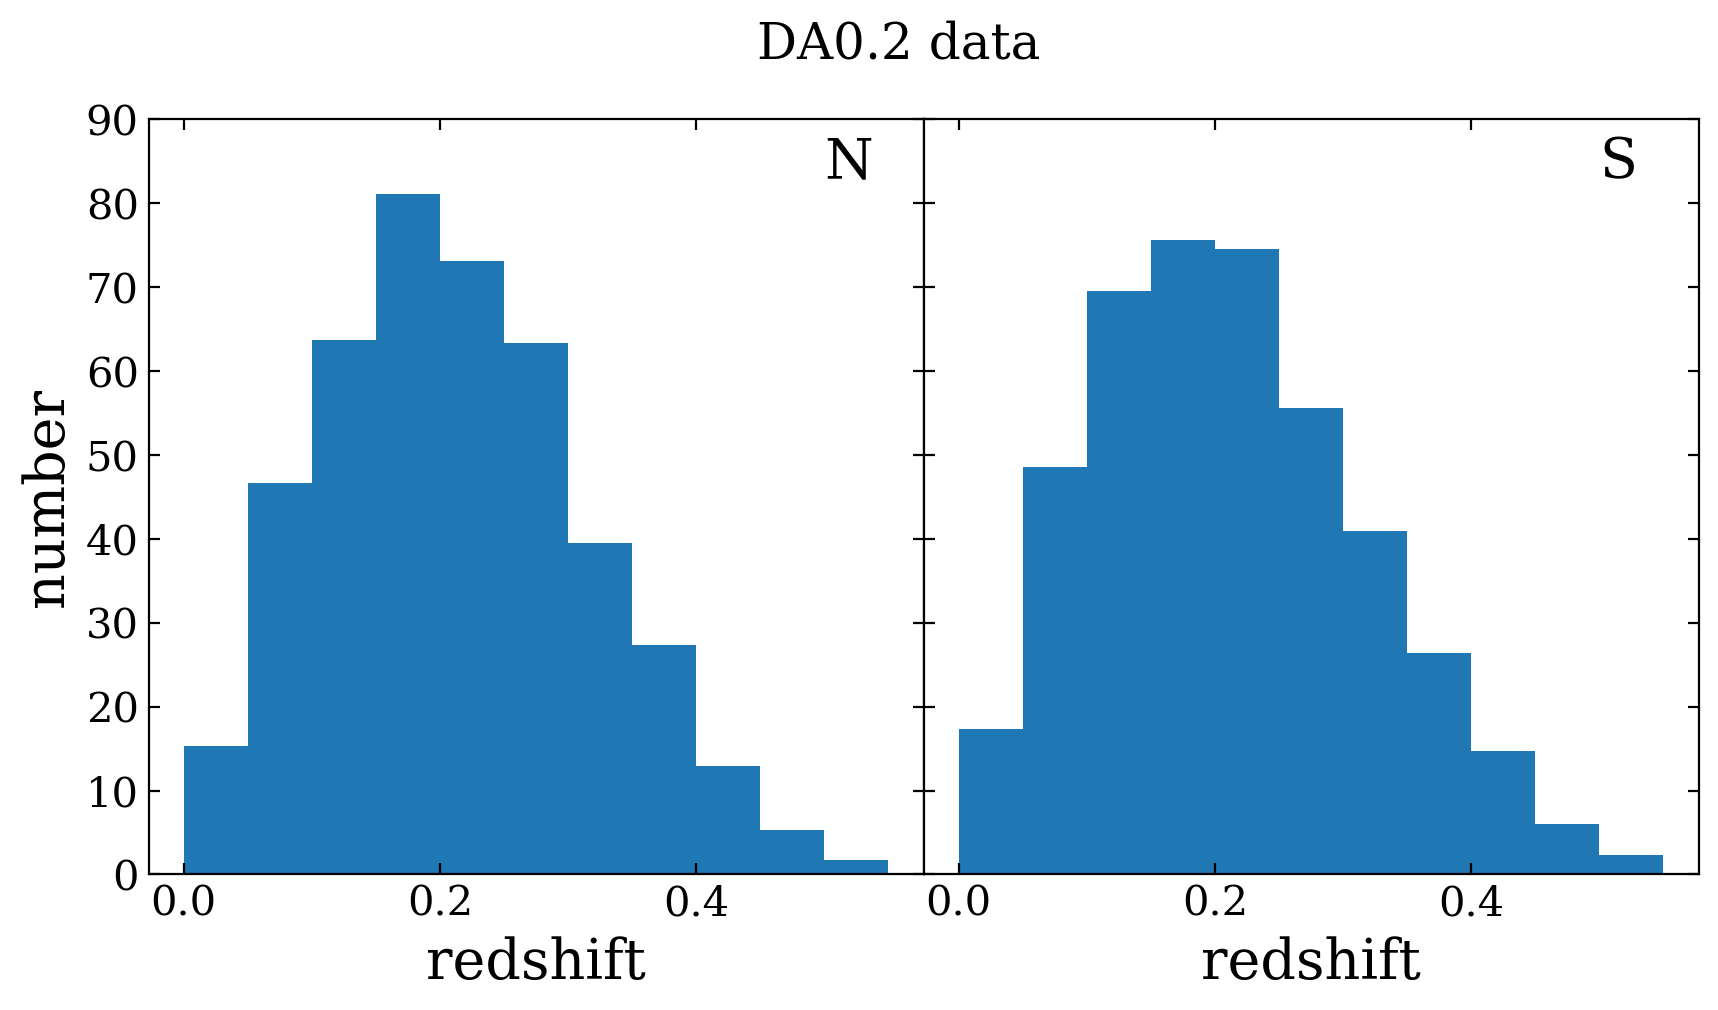

In [21]:
s=20
plt.figure(figsize=(10,5),dpi=200)
plt.suptitle("DA0.2 data")
ax1 = plt.subplot(121)
plt.text(0.5,83, 'N', size=s)
ax1.hist(N['Z'], bins=np.arange(0.0,0.6,0.05), weights=1/N['AREA'])
plt.xlabel('redshift', size=s)
plt.ylabel('number', size=s)
plt.ylim(0,90)

ax2 = plt.subplot(122)
plt.text(0.5,83, 'S', size=s)
ax2.hist(S['Z'], bins=np.arange(0.0,0.6,0.05), weights=1/S['AREA'])
plt.xlabel('redshift', size=s)
plt.ylim(0,90)
ax2.set_yticklabels([])

plt.subplots_adjust(wspace=0)

ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.show()

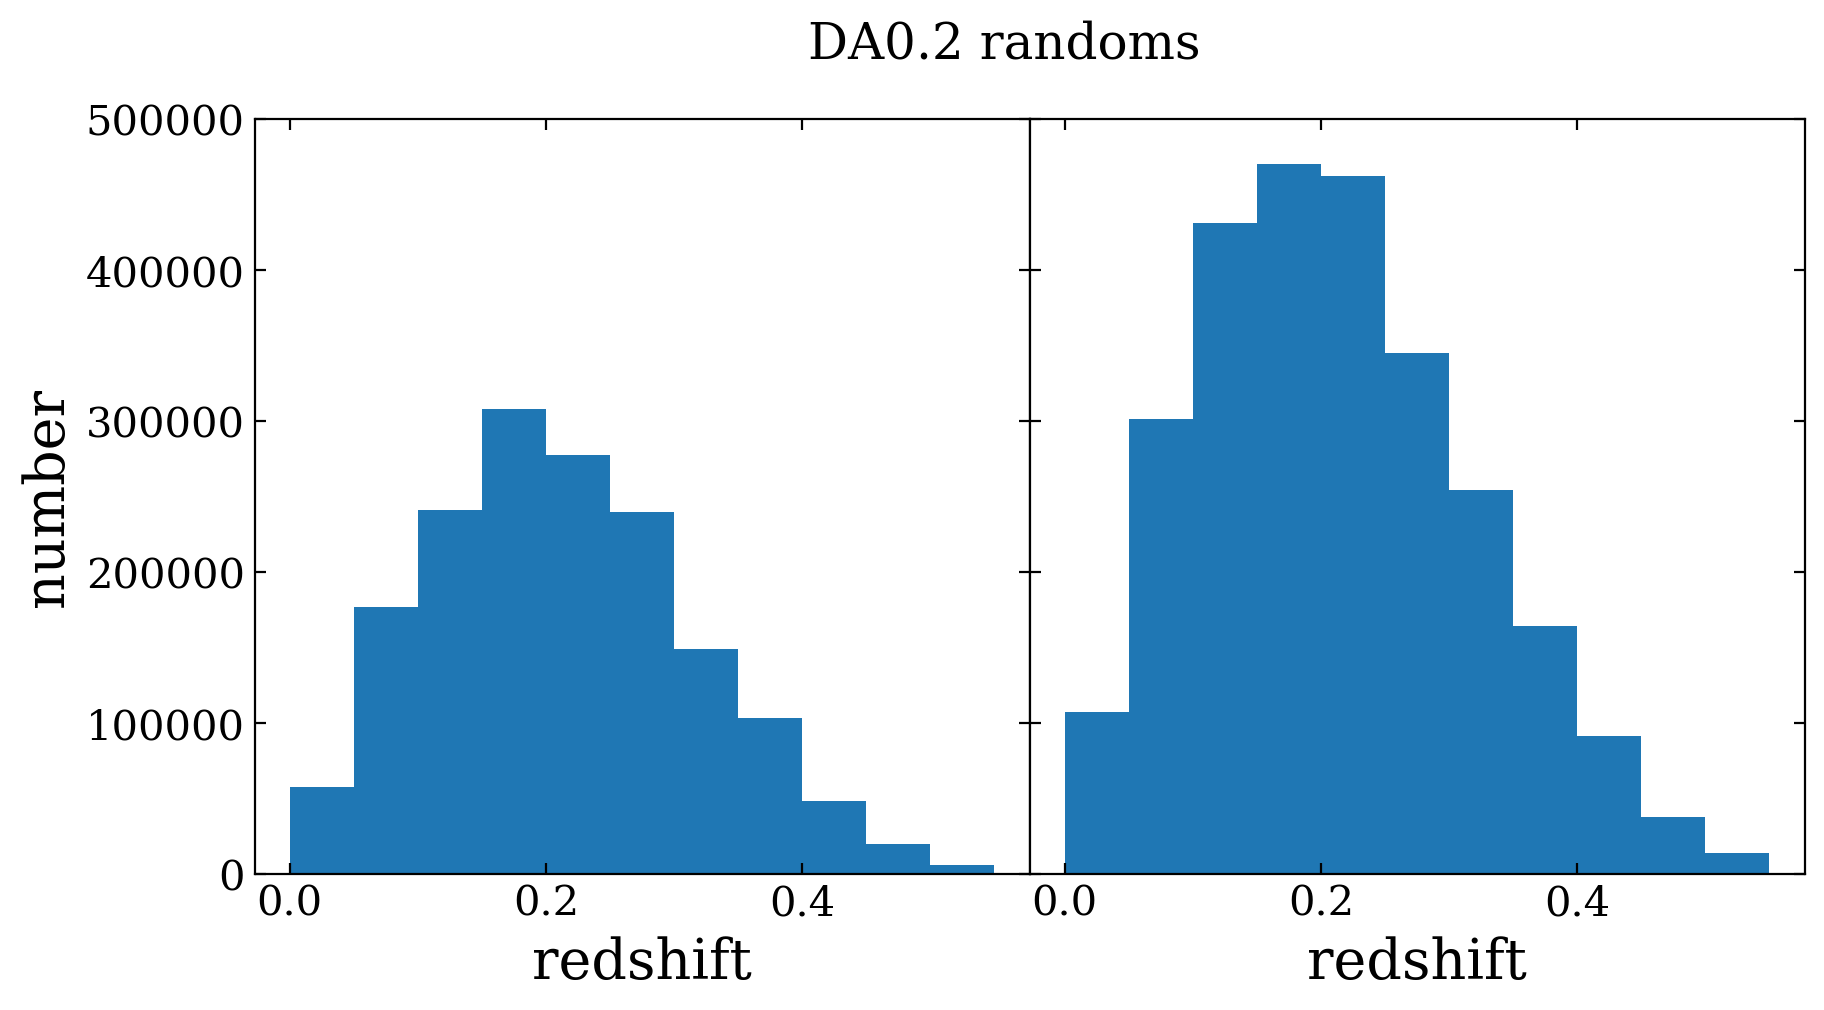

In [44]:
s=20
plt.figure(figsize=(10,5),dpi=200)
plt.suptitle("DA0.2 randoms")
ax1 = plt.subplot(121)
# plt.text(0.5,27, 'N', size=s)
ax1.hist(N0['Z'], bins=np.arange(0.0,0.6,0.05))
plt.xlabel('redshift', size=s)
plt.ylabel('number', size=s)
plt.ylim(0,500000)

ax2 = plt.subplot(122)
# plt.text(0.5,27, 'S', size=s)
ax2.hist(S0['Z'], bins=np.arange(0.0,0.6,0.05))
plt.xlabel('redshift', size=s)
plt.ylim(0,500000)
ax2.set_yticklabels([])

plt.subplots_adjust(wspace=0)

ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.show() # Differences in number as not weighted by area

In [28]:
sys.path.append(os.environ['HOME'] + '/code/project_handover') # Add path to plotting.py so can be used

import plotting # Just a nicer way of plotting histograms

Colour distribution as a function of redshift

(array([     1,      3,      6, ..., 749595, 749597, 749598]),)


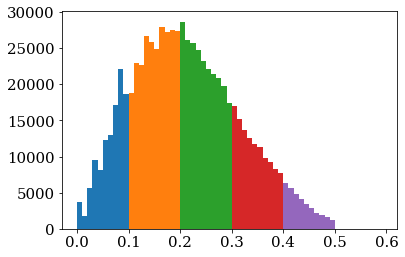

In [49]:
z01 = np.where(np.logical_and(data['Z'] > 0, data['Z'] < 0.1))
z12 = np.where(np.logical_and(data['Z'] > 0.1, data['Z'] < 0.2))
z23 = np.where(np.logical_and(data['Z'] > 0.2, data['Z'] < 0.3))
z34 = np.where(np.logical_and(data['Z'] > 0.3, data['Z'] < 0.4))
z45 = np.where(np.logical_and(data['Z'] > 0.4, data['Z'] < 0.5))
print(z12)
plt.figure()
plt.hist(data['Z'][z01], bins=np.arange(0,0.6,0.01))
plt.hist(data['Z'][z12], bins=np.arange(0,0.6,0.01))
plt.hist(data['Z'][z23], bins=np.arange(0,0.6,0.01))
plt.hist(data['Z'][z34], bins=np.arange(0,0.6,0.01))
plt.hist(data['Z'][z45], bins=np.arange(0,0.6,0.01))
plt.show()


## Splitting sample into red and blue based on magnitude-dependent colour cut as in Zehavi et al. (2011)

In [25]:
def colour_cut(absmag):
    return 0.21 - 0.03*absmag

data['COLOUR_CUT'] = colour_cut(data['ABSMAG_RP1'])
data['COLOUR_CUT']

absmag_range = np.arange(-24.5,-13,0.1)
colour_cut = colour_cut(absmag_range)

In [26]:
red = np.where(data['REST_GMR_0P1'] > data['COLOUR_CUT'])
blue = np.where(data['REST_GMR_0P1'] <= data['COLOUR_CUT'])
red_data = data[red]
blue_data = data[blue]
print(red)
print(blue)

(array([     0,      2,      3, ..., 749592, 749596, 749599]),)
(array([     1,      4,      6, ..., 749595, 749597, 749598]),)


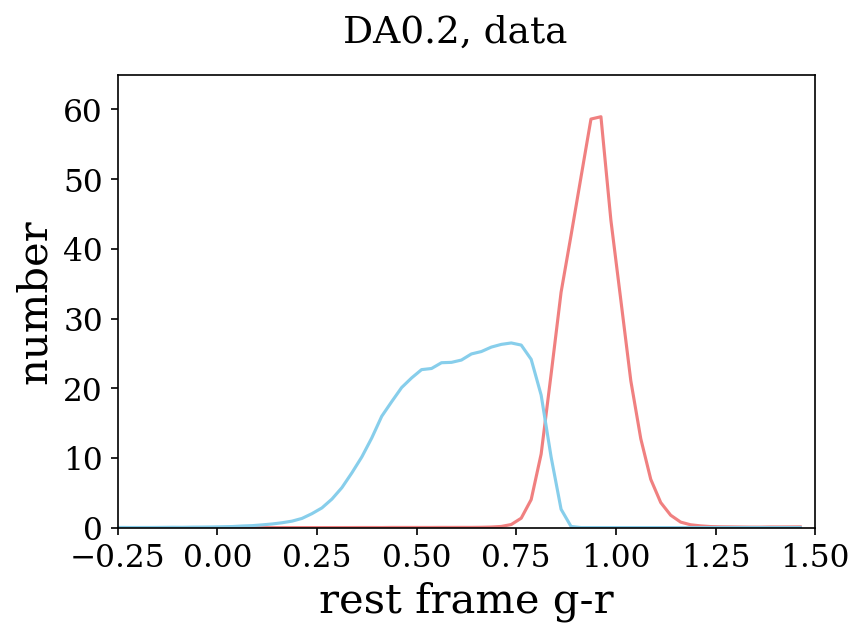

In [38]:
s=20
plt.figure(dpi=150)
plt.suptitle("DA0.2, data")
plotting.hist(red_data['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025), weights=1/red_data['AREA'], color='lightcoral')
plotting.hist(blue_data['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025), weights=1/blue_data['AREA'], color='skyblue')
plt.xlabel('rest frame g-r', size=s)
plt.ylabel('number', size=s)
plt.xlim(-0.25,1.5)
plt.ylim(0,65)

ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.show()